In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as a

In [2]:


data=pd.read_csv("Airbnb NYC 2019.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*checking  for missing values:*

In [8]:
data[data["price"]<500].price.mean()

130.0539026437264

In [4]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

reviews_per_month                 20.558339
last_review                       20.558339
host_name                          0.042949
name                               0.032723
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

In [5]:
data[data["number_of_reviews"]==0][["reviews_per_month","last_review"]]

,reviews_per_month,last_review
2,NaN,NaN
19,NaN,NaN
26,NaN,NaN
36,NaN,NaN
38,NaN,NaN
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


It can be seen that for "number of reviews"=0,reviews_per_month and last_review are the missing values.This can be replaced with 0's.Also, host_name and dosent contribute for the variation of price.So these can be dropped too!
Also null values in name  can be replaced by "NONE", to avoid errors during EDA

In [6]:
data.drop(["host_name","id"],axis=1,inplace=True)
data["reviews_per_month"].fillna(0,inplace=True)
data["last_review"].fillna(0,inplace=True)
data["name"].fillna("NONE",inplace=True)

In [7]:
data.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#  EDA:
* Dependennt Variable(Price)
* Independent Variables

   **Dependent Variable(Price)**

C:\Users\Sharath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

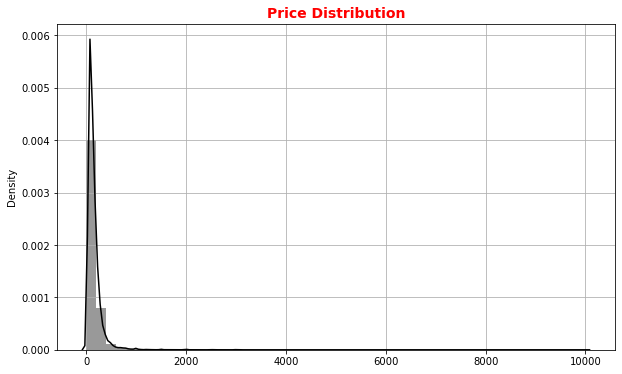

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(x=data['price'],color="black")
plt.grid(True)
plt.title("Price Distribution",size=14,weight="bold",color="red")
# plt.xlim([0,500])
# plt.savefig('1.png',dpi=1000)

* The distribution of price is <b>Skewed</b>.There's a high probability of finding a value < 2000 . There are less values above 2000 ,they go upto 10000.The average pricing of a listing  is below 500$.

In [10]:
print("skewness:",data['price'].skew())
print("Kurtosis:",data['price'].kurt())

skewness: 19.118938995046033
Kurtosis: 585.6728788988286


<AxesSubplot:title={'center':'Price < 500 Distribution_boxplot'}, ylabel='price'>

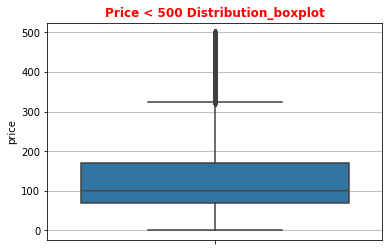

In [11]:
plt.title("Price < 500 Distribution_boxplot",size=12,weight="bold",color="r")
plt.grid("True")
sns.boxplot(y=data[data["price"]<500]["price"])
# plt.savefig('3.png',dpi=1000)

Text(0.5, 1.0, 'Price Distribution_boxplot')

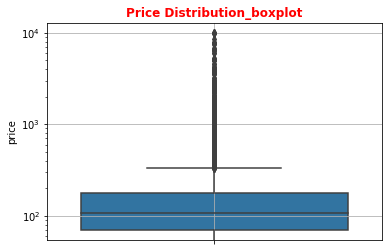

In [12]:
sns.boxplot(y=data["price"])
plt.semilogy()
plt.grid("True")
plt.title("Price Distribution_boxplot",size=12,weight="bold",color="r")
# plt.savefig('2.png',dpi=1000)



* This indicates the mean Value of the price in the data is around 100, but the values go upto 10,000.They are outliers,which can be due to  errors or there might be an actual reason for high values.

**Therefore the Price Variable:**

* *<b>Deviates from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Shows peakedness.</b>*

# Relationship with Dependent variables(Bivariate Anaysis)

# categrorical:

# Neighbourhood_group:

Text(0.5, 1.0, 'Neighbourhood Distribution')

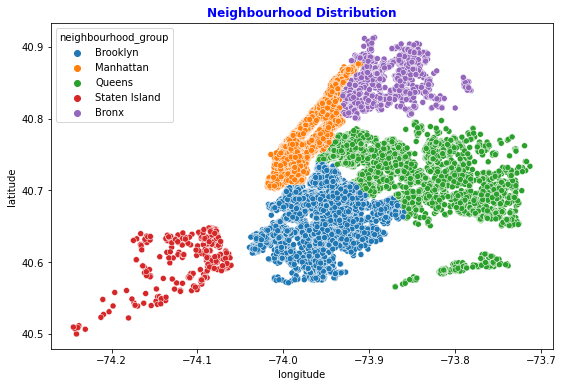

In [13]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=data["longitude"],y=data["latitude"],hue=data["neighbourhood_group"])
plt.title("Neighbourhood Distribution",size=12,weight="bold",color="b")
# plt.savefig('3.png',dpi=1000)

Text(0.5, 1.0, 'Neighbourhood count')

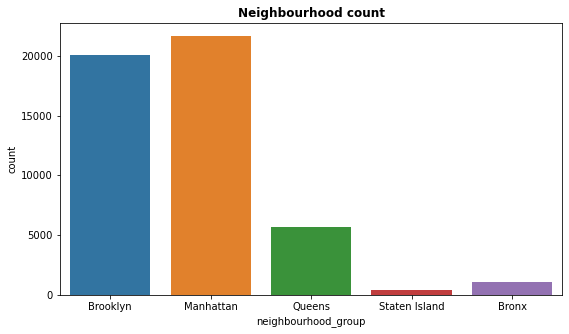

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(x=data["neighbourhood_group"])
plt.title("Neighbourhood count",size=12,weight="bold",color="black")
# plt.savefig('4.png',dpi=1000)

Text(0.5, 1.0, 'Price vs Latitude/Longitude')

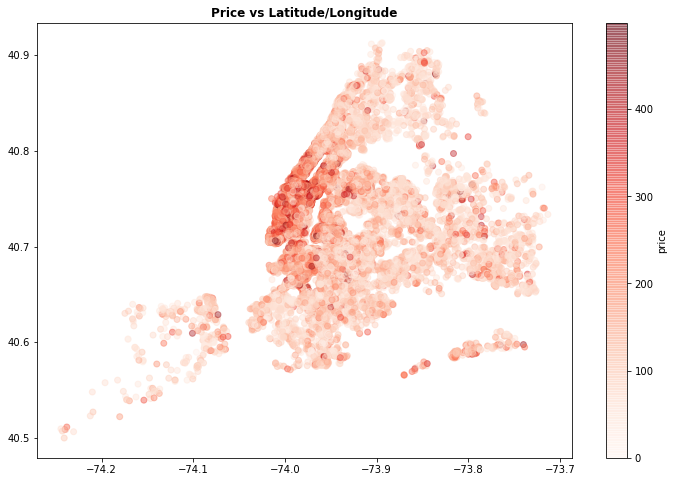

In [15]:
plt.figure(figsize=(12, 8))
hx=plt.scatter(data[data["price"]<500].longitude, data[data["price"]<500].latitude, c=data[data["price"]<500].price,cmap='Reds', linewidth=1, alpha=0.4)
# plt.imshow(X[0].reshape(28,28))
cbar = plt.colorbar()
cbar.set_label('price')
plt.title("Price vs Latitude/Longitude", weight="bold")
# plt.savefig('5.png',dpi=1000)

* The area which is highlighted the most is Manhattan
* Thus we can cnclude that majority of the listings(Approx. 50%) are in manhatten  and are expensive.
* This makes sence, not only Manhattan is the one of the expensive cities on the planet , but it also attracts many tourists

Text(0.5, 0.98, 'Price Dist')

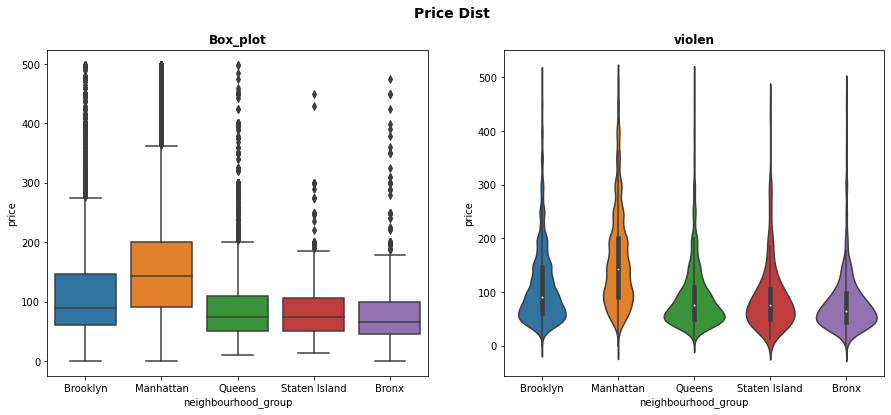

In [16]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.boxplot(data=data[data["price"]<500], x='neighbourhood_group', y='price',ax=ax[0])
sns.violinplot(data=data[data["price"]<500], x='neighbourhood_group', y='price',ax=ax[1])
ax[0].set_title("Box_plot",weight="bold")
ax[1].set_title("violen",weight="bold")
fig.suptitle('Price Dist',weight="bold",size=14)
# plt.savefig('6.png',dpi=1000)

* Manhattan and Brooklyn has highest number of listings followed by Queens,Bronx,Staten island.
* Since the data has more outliers,for better visualization price is cut down to 500.Manhattan seems to be more expensive(approximately 150 dollars). 
* Queens and Staten Island haves similar avg. price.However,considering the distribution of both,Queen's  prices tend to be <b>more</b> spread out.
* Brox is the least expensive neighbourhood
* Manhatten is expensive other neighbourhood have outliers

plt.style.context('dark_background')

Text(0.5, 1.0, 'PRICE>500')

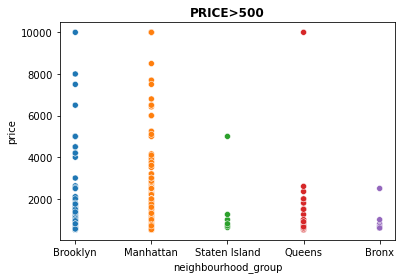

In [17]:
sns.scatterplot(data=data[data["price"]>500], x='neighbourhood_group', y='price',hue="neighbourhood_group",legend=False)
plt.title("PRICE>500",weight="bold")
# plt.savefig('7.png',dpi=1000)

* The maximum price of a listing is 10000 dollars, which are from Brooklyn Manhattan and Queens


#  HOST_ID and Listings:

Text(0.5, 1.0, 'Top hosts')

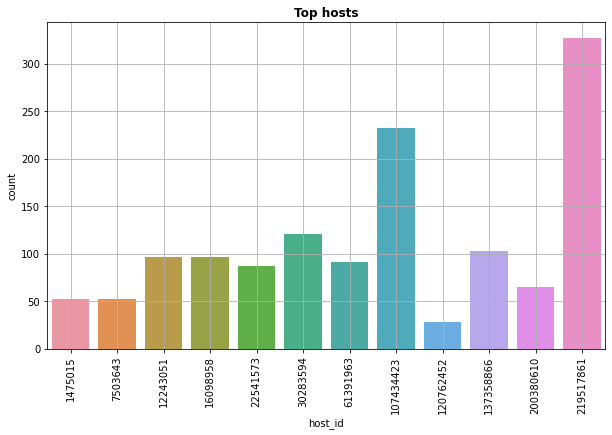

In [18]:
data["host_id"].value_counts()[:10]
plt.figure(figsize=(10,6))
sns.countplot(x=data.sort_values(by="calculated_host_listings_count",ascending=False)[:1350]["host_id"])
plt.xticks(rotation=90)
plt.grid("True")
plt.title("Top hosts",weight="bold")
# plt.savefig('8.png',dpi=1000)

Text(0.5, 1.0, 'Top Hosts by Areas')

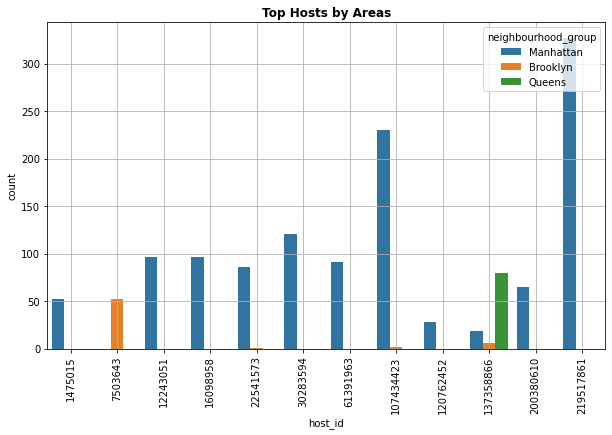

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=data.sort_values(by="calculated_host_listings_count",ascending=False)[:1350]["host_id"],hue=data.sort_values(by="calculated_host_listings_count",ascending=False)[:1350]["neighbourhood_group"])
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Top Hosts by Areas",weight="bold")
# plt.savefig('9.png',dpi=1000)

* The first figure plots the top hosts.i.e The hosts with maximum listings.
* Top host has maximum listing  (300+).
* The second figure shows the areas of  maximum listings by these hosts.
* Although, some hosts have listings in multiple neighbourhoods,It can be seen that maximum listings of top hosts are from Manhattan only.


#  Room Type:

Text(0.5, 1.0, 'Room type count')

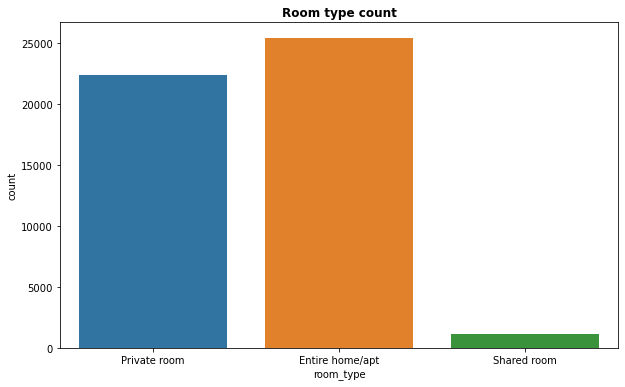

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=data["room_type"])
plt.title("Room type count",weight="bold")
# plt.savefig('10.png',dpi=1000)

Text(0.5, 1.0, 'Neighbourhood groups')

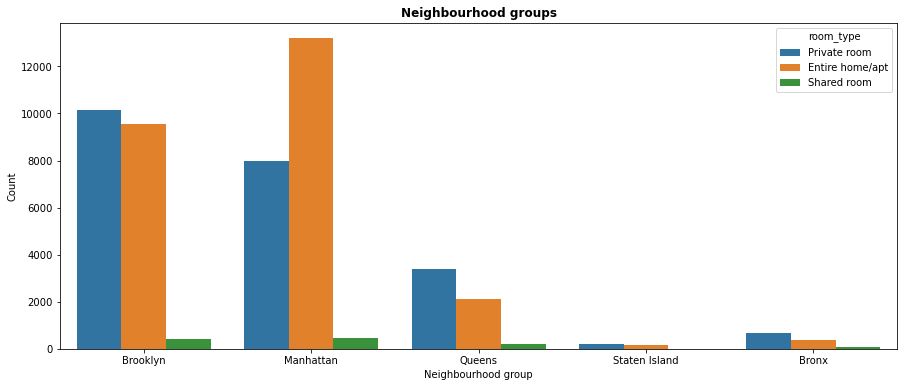

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x=data["neighbourhood_group"],hue=data["room_type"])
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.title("Neighbourhood groups",weight="bold")
# plt.savefig("11.png",dpi=1000)

From all the hosts in New York around 98% of them offer either entire home or private room.

Text(0.5, 0.98, 'Price Dist Vs Room type')

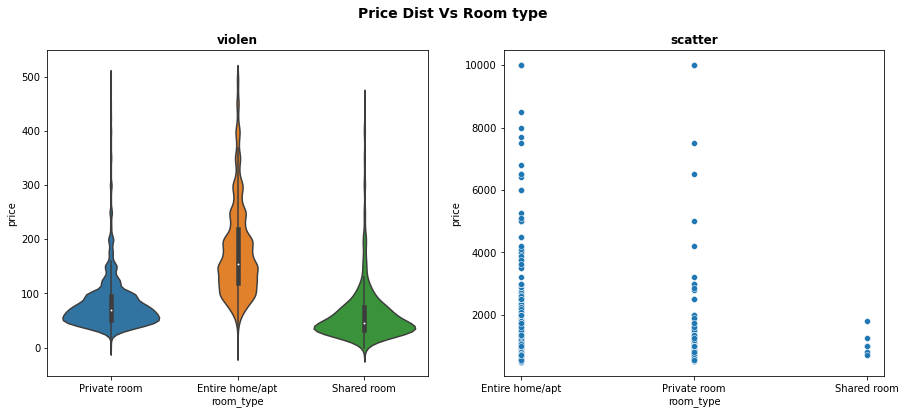

In [22]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.violinplot(x=data[data["price"]<500]["room_type"],y=data[data["price"]<500]["price"],ax=ax[0])
sns.scatterplot(x=data[data["price"]>500]["room_type"],y=data[data["price"]>500]["price"],ax=ax[1])
ax[0].set_title("violen",weight="bold")
ax[1].set_title("scatter",weight="bold")
fig.suptitle('Price Dist Vs Room type',weight="bold",size=14)
# plt.savefig('12.png',dpi=1000)

* Almost all the listings are either Private rooms or Entire apartment.
* Manhattan has more apartments than Private rooms ,where as brooklyn has quiet the opposite.
* Since apatrments are expensive than private rooms espically Manhattan,this explains the price distribution
* Also,Shared room is barely available in Statn island and Bronyx

# Neighbourhood:

In [17]:
data.neighbourhood.nunique()

221

In [15]:
data.groupby("neighbourhood_group")["neighbourhood"].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood, dtype: int64

In [16]:
data.groupby("neighbourhood_group")["neighbourhood"].nunique()

neighbourhood_group
Bronx            48
Brooklyn         47
Manhattan        32
Queens           51
Staten Island    43
Name: neighbourhood, dtype: int64

In [23]:
data["neighbourhood"].value_counts()[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [24]:
d2=data[["neighbourhood","neighbourhood_group","room_type"]]
most_frequent_n=data["neighbourhood"].value_counts().sort_values(ascending=False)[:10]
most_frequent_n

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [25]:
most_frequent_n.index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

In [26]:
d3=pd.DataFrame()
for i in most_frequent_n.index:
    d3=pd.concat([d3,(d2[d2["neighbourhood"]==i])])
d3

,neighbourhood,neighbourhood_group,room_type
15,Williamsburg,Brooklyn,Entire home/apt
20,Williamsburg,Brooklyn,Entire home/apt
52,Williamsburg,Brooklyn,Entire home/apt
55,Williamsburg,Brooklyn,Entire home/apt
60,Williamsburg,Brooklyn,Private room
...,...,...,...
48746,Midtown,Manhattan,Entire home/apt
48748,Midtown,Manhattan,Entire home/apt
48755,Midtown,Manhattan,Private room
48830,Midtown,Manhattan,Entire home/apt


Text(0.5, 1.0, 'Most frequent Neighbourhoods')

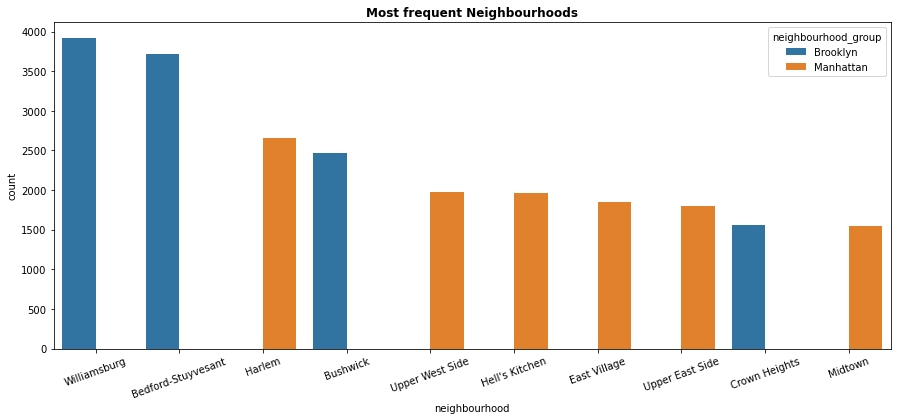

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x=d3["neighbourhood"],hue=d3["neighbourhood_group"])
plt.xticks(rotation=20)
plt.title("Most frequent Neighbourhoods",weight="bold")
# plt.savefig('13.png',dpi=1000)

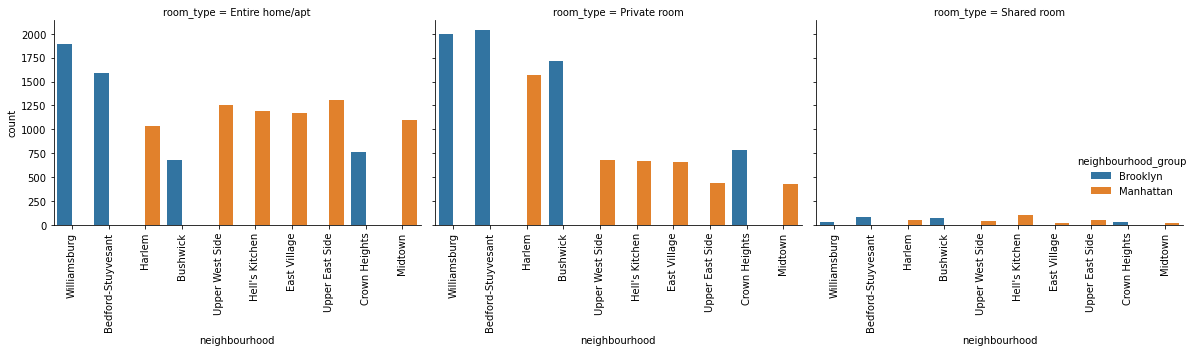

In [28]:
ax=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=d3, kind='count')
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
# plt.savefig("14.png",dpi=1000)

* Wissiamsburg and Bedford for Manhattan and Harlem for Brooklyn  are  the neighbourhoods where most of the listings are present
* Both of these neighbourhoods have  more apartments and Pvt. rooms

In [31]:
exp_nbhood=data.groupby("neighbourhood").agg({"price":"max","neighbourhood_group":np.unique}).reset_index().sort_values(by="price",ascending=False)

In [32]:
exp_nbhood["room"]="none"
for i in range(len(d2)):
    exp_nbhood["room"][i]=(data.loc[(data["neighbourhood"]==exp_nbhood.neighbourhood[i]) & (data["price"]==exp_nbhood.price[i]) &  (data["neighbourhood_group"]==exp_nbhood.neighbourhood_group[i])]["room_type"]).values[0]
exp_nbhood

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sharath\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

KeyError: 221

In [33]:
exp_nbhood.reset_index(inplace=True)

Text(0.5, 1.0, 'Neighbourhood with expensive listing')

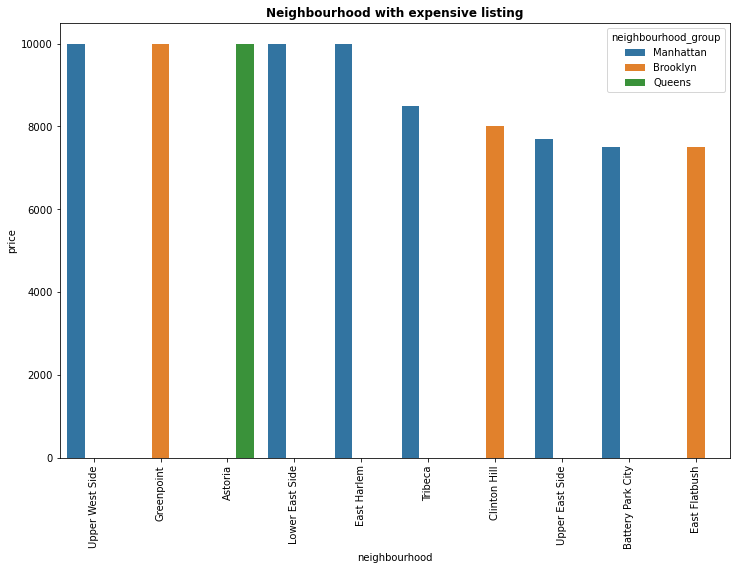

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(y=exp_nbhood[:10]["price"],x=exp_nbhood[:10]["neighbourhood"],hue=exp_nbhood[:10]["neighbourhood_group"])
plt.xticks(rotation=90)
plt.title("Neighbourhood with expensive listing",weight="bold")
# plt.savefig('15.png')

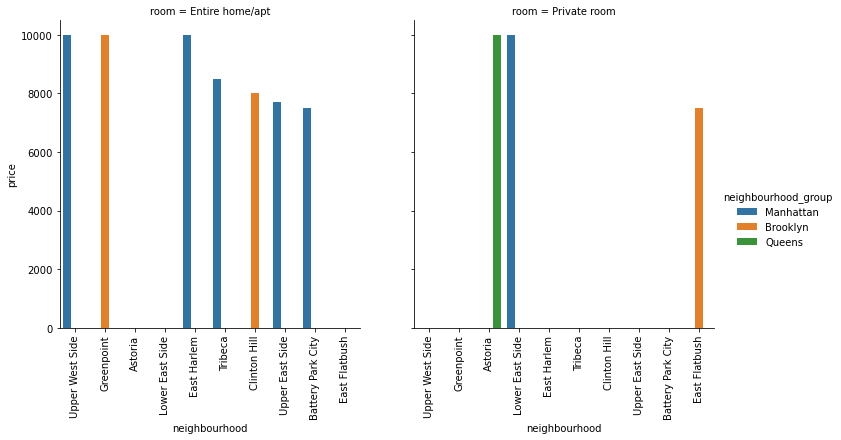

In [35]:
ax=sns.catplot(data=exp_nbhood[:10],kind="bar",x="neighbourhood",y="price",col="room",hue="neighbourhood_group")
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
# plt.savefig('16.png')

* These are the neighbourhoods with the most expensive listings, the prices go upto 10000 dollars
* Also in the second figure,it is evident that the apartments in these neighbourhoods are  expensive than most of private rooms.
* Almost all of the expensive listings are from Manhattan  and Brooklyn and most of them are apartments.
* There are few private rooms which are more expensive than apartments in Mannhatten and Brooklyn in some neighbourhoods.


In [36]:
private_room_expensive=exp_nbhood[:10][exp_nbhood[:10]["room"]=="Private room"].reset_index(drop=True)

In [37]:
k=pd.DataFrame()
for i in range(len(private_room_expensive)):
    temp=(pd.DataFrame((data.loc[(data["neighbourhood"]==private_room_expensive.neighbourhood[i]) & (data["price"]==private_room_expensive.price[i]) & (data["room_type"]==private_room_expensive.room[i])])))
    k=pd.concat([k,temp])
k

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
45666,Gem of east Flatbush,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179


* These are the places where pvt room is more expensive than Apt, even in Manhattan.These can be outliers or may be the reason for this can be it is furnished, or a classic one.The "name" column might explain this.


# Most expensive neighbourhood

In [18]:
mean_data=data.groupby("neighbourhood").agg({"price":"mean","neighbourhood_group":np.unique}).reset_index().sort_values(by="price",ascending=False)

Text(0.5, 1.0, 'Most Expensive Neighbourhods')

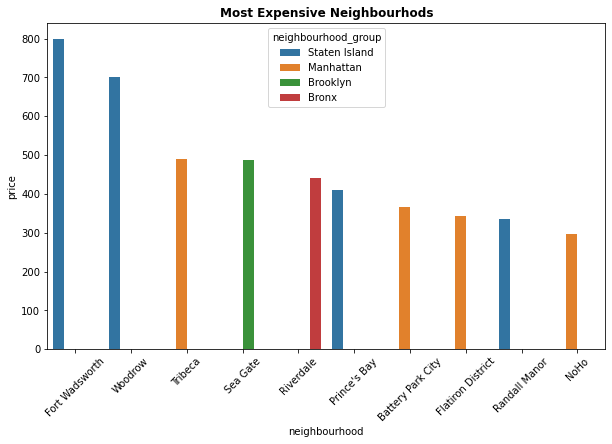

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_data[:10],x="neighbourhood",y="price",hue="neighbourhood_group")
plt.xticks(rotation=45)
plt.title("Most Expensive Neighbourhods",weight="bold")
# plt.savefig('17.png')

Text(0.5, 1.0, 'cheaper Neighbourhods')

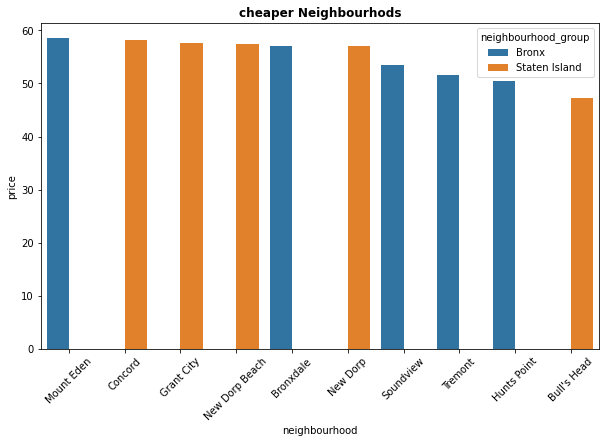

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data=mean_data[-10:],x="neighbourhood",y="price",hue="neighbourhood_group")
plt.xticks(rotation=45)
plt.title("cheaper Neighbourhods",weight="bold")
# plt.savefig('18.png')

* On Average, The neighbourhoods in figure 1  are the most expensive neighbourhoods.Majority of them are from Manhattan and Brooklyn.The price can range upto 800 dollars.
* where as, the neighbourhoods in the figure 2 are the least expensive one,and they range from 30 to 60 dollars
*  all the cheaper neigbourhoods are from Bronx and staten island

# Numerical

# Availability

Text(0.5, 1.0, 'Availability')

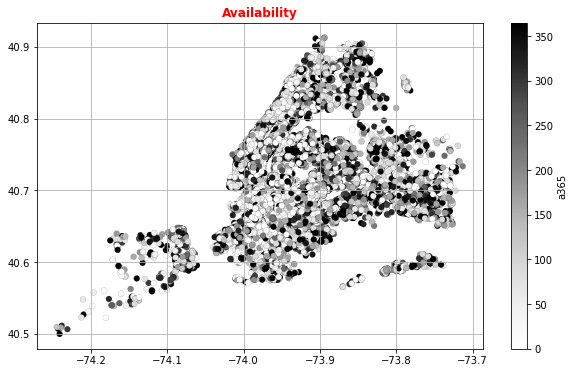

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(x=data[data["price"]<40000].longitude, y=data[data["price"]<40000].latitude,c=data[data["price"]<40000].availability_365,cmap="Greys",edgecolor='Black', linewidth=0.1)
c_b=plt.colorbar()
c_b.set_label('a365')
plt.grid("True")
plt.title("Availability",color="r",weight="bold")
# plt.savefig('19.png',dpi=1000)

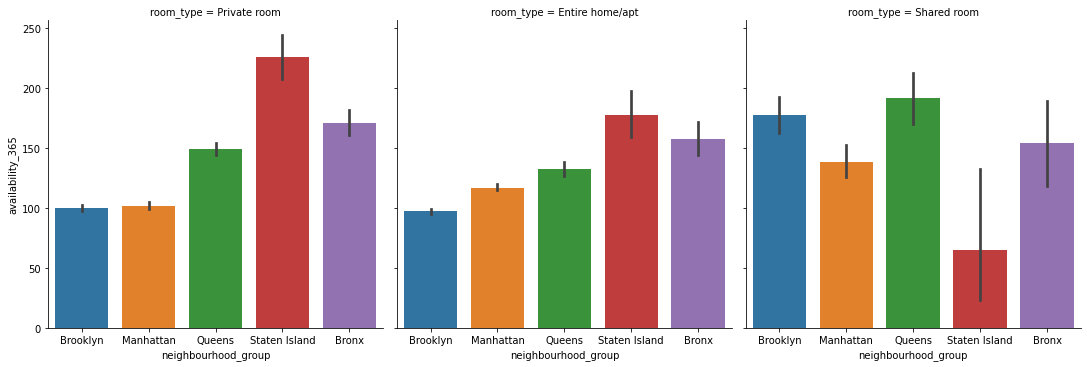

In [42]:
sns.catplot(data=data,kind="bar",x="neighbourhood_group",y="availability_365",col="room_type")
# plt.savefig('20.png')

*  The  availability can be plotted using latitude and longitude.On Avg, private Room is least available  in Brooklyn and Manhattan, this is the same for Apartment.But for a shared room, the availability is more for Queens and Brooklyn
* since Manhattan is the busiest and most visited it is  the least available 

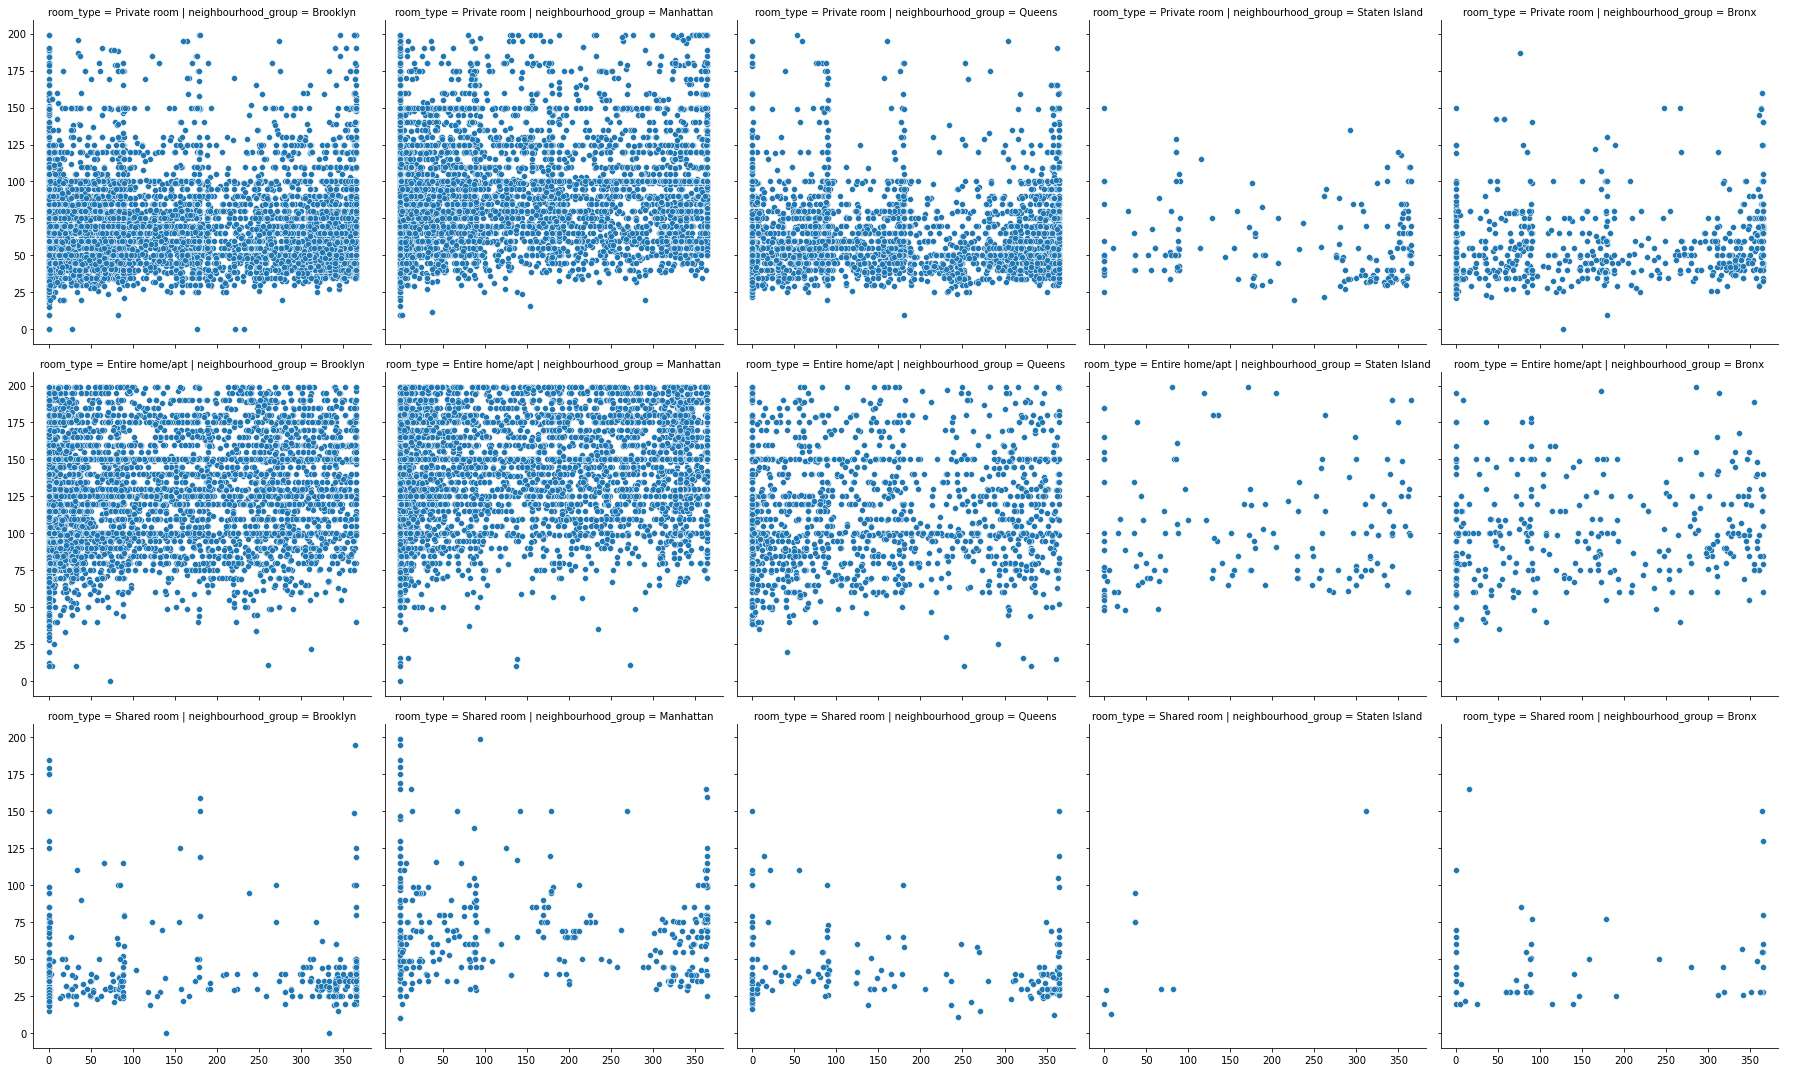

In [43]:
g=sns.FacetGrid(col="neighbourhood_group",data=data.loc[(data["price"]<200)],row="room_type",height=5, palette="pastel")
g.map_dataframe(sns.scatterplot,x="availability_365",y="price")
g.add_legend()
# plt.savefig("21.jpg",dpi=700)

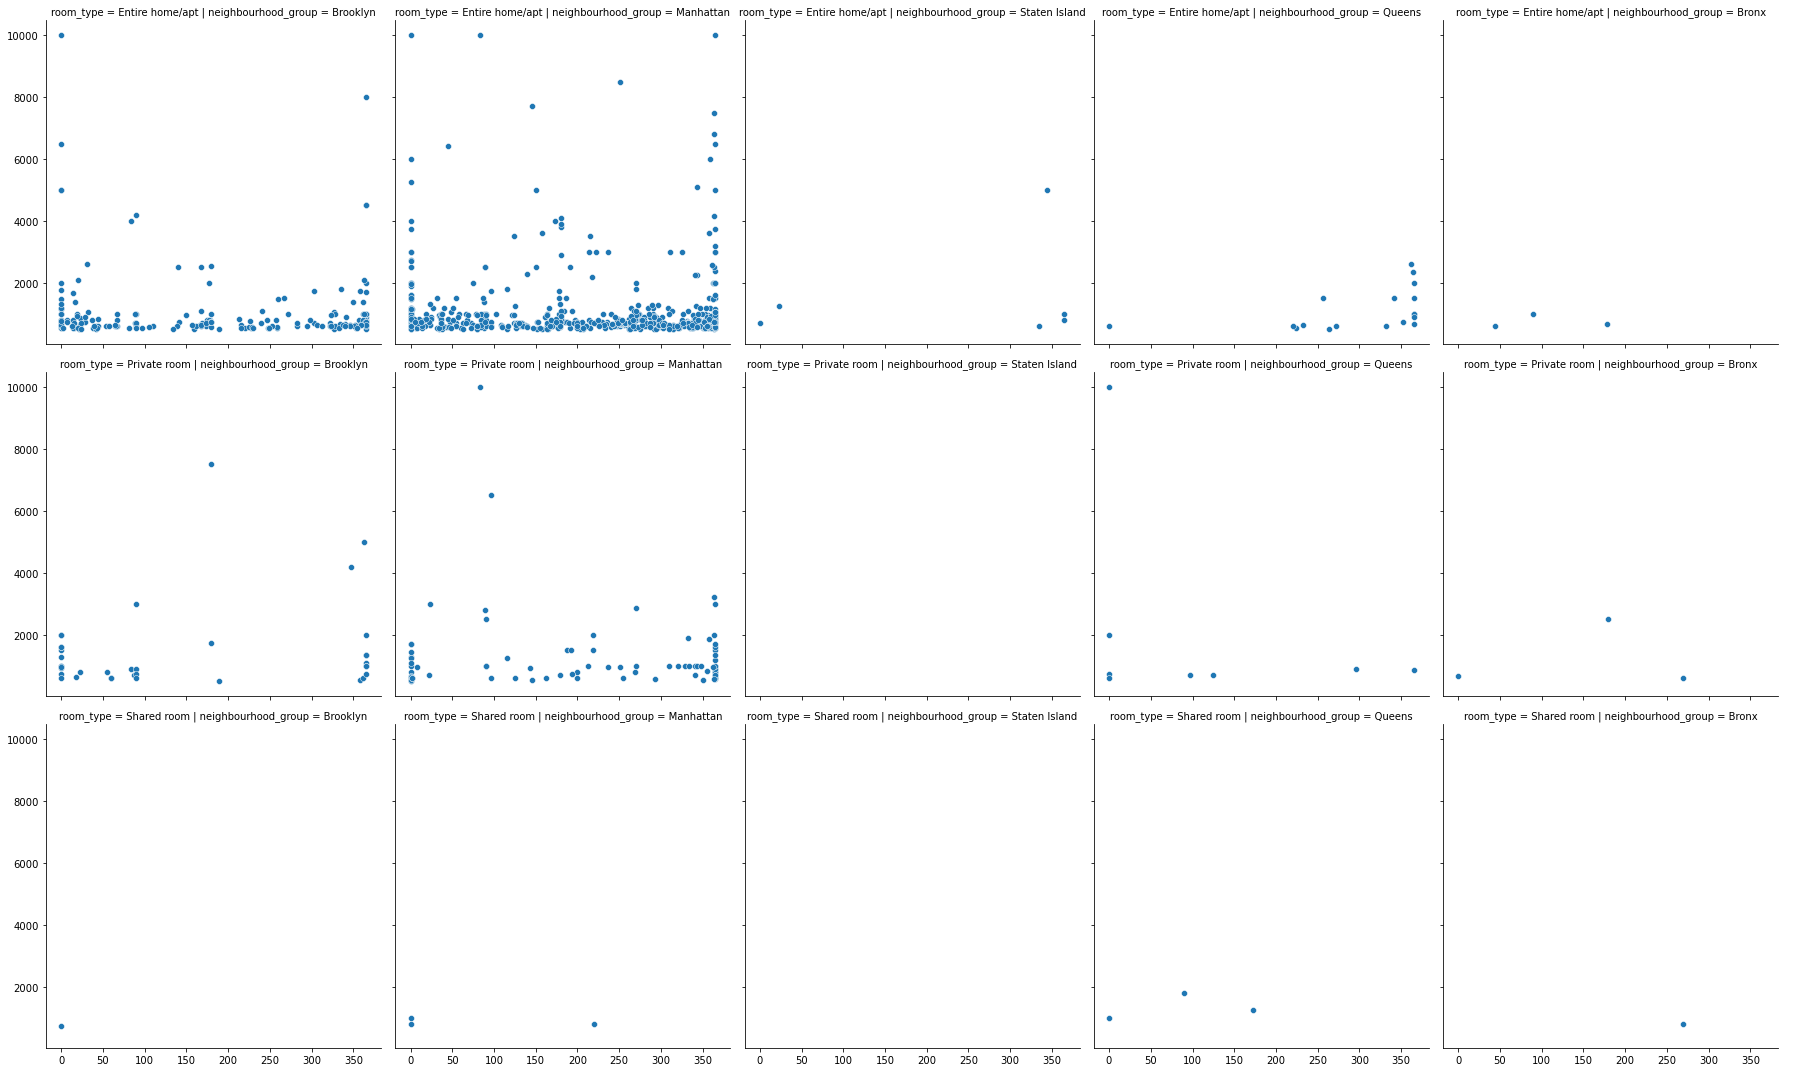

In [44]:
g=sns.FacetGrid(col="neighbourhood_group",data=data.loc[(data["price"]>500) ],row="room_type",height=5, palette="pastel")
g.map_dataframe(sns.scatterplot,x="availability_365",y="price")
g.add_legend()
# plt.savefig("22.jpg")

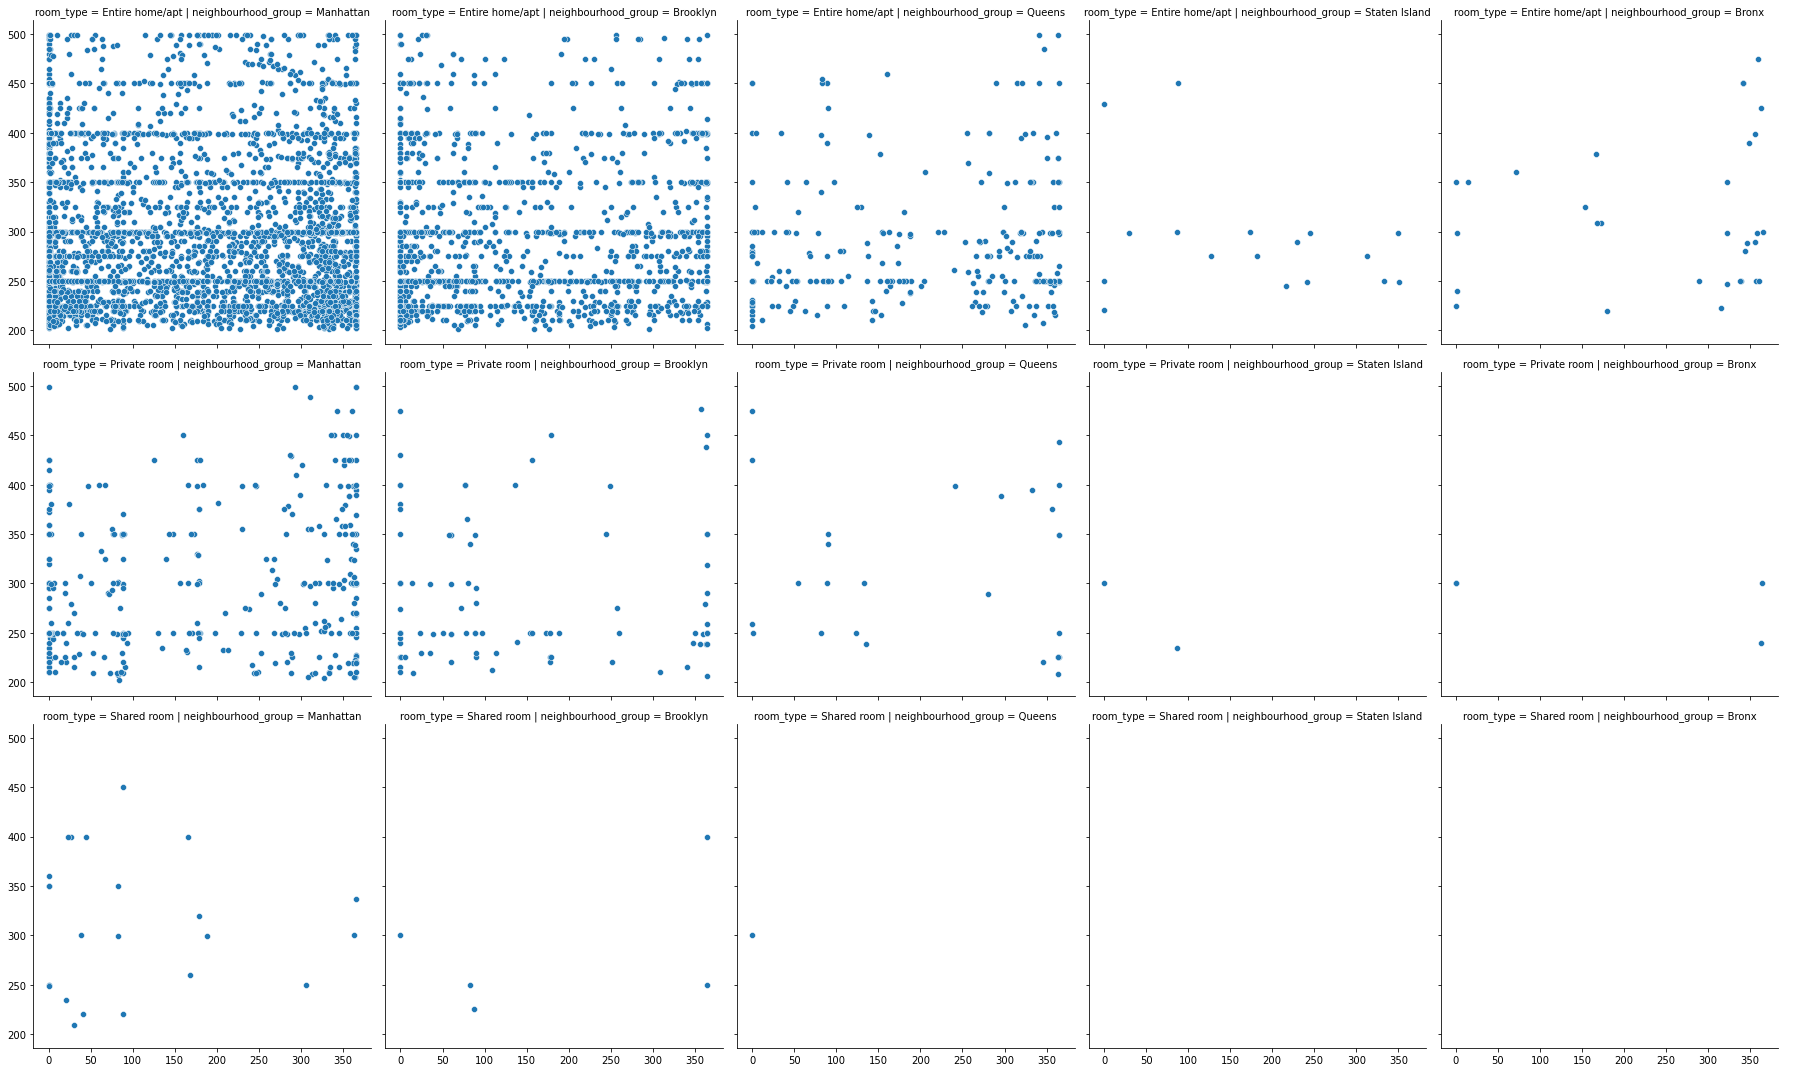

In [45]:
g=sns.FacetGrid(col="neighbourhood_group",data=data.loc[(data["price"]<500) &(data["price"]>200)],row="room_type",height=5, palette="pastel")
g.map_dataframe(sns.scatterplot,x="availability_365",y="price")
g.add_legend()
plt.savefig("22.jpg")

* For private Room:the listings which are priced below 200, There's a high variance in the availability of rooms for Manhattan and brooklyn.
* For shared room in Brooklyn, the avg. avalibility  is less than 200 days.
* For high priced rooms, the avalibility is either more or very less


# Minimum Nights

C:\Users\Sharath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Minimum Nights distribution')

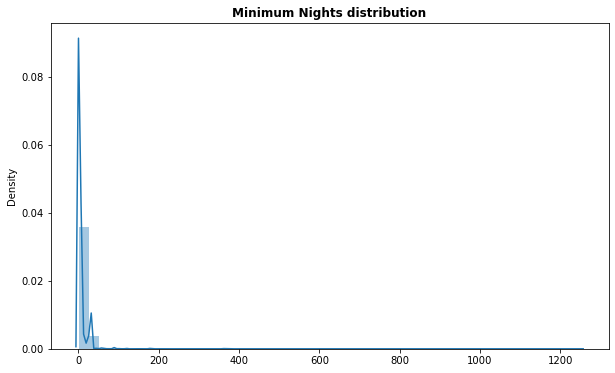

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(x=(data["minimum_nights"]))
plt.title("Minimum Nights distribution",weight="bold")
# plt.savefig("23.jpg",dpi=1000)

Text(0.5, 1.0, 'Availability vs minimum nights')

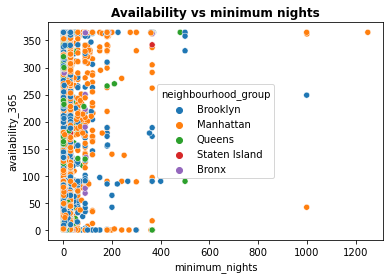

In [47]:
sns.scatterplot(x=data["minimum_nights"],y=data["availability_365"],hue=data["neighbourhood_group"])
plt.title("Availability vs minimum nights",weight="bold")
# plt.savefig("24.jpg",dpi=1000)

Text(0.5, 1.0, 'Price  Vs Min_nights')

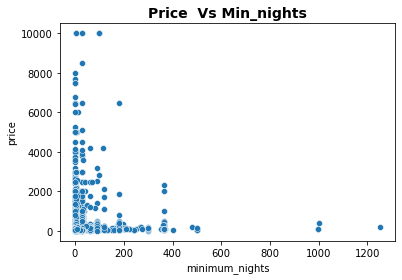

In [48]:
sns.scatterplot(data=data,x="minimum_nights",y="price")
plt.title('Price  Vs Min_nights',weight="bold",size=14)
# plt.savefig("25.jpg",dpi=1000)

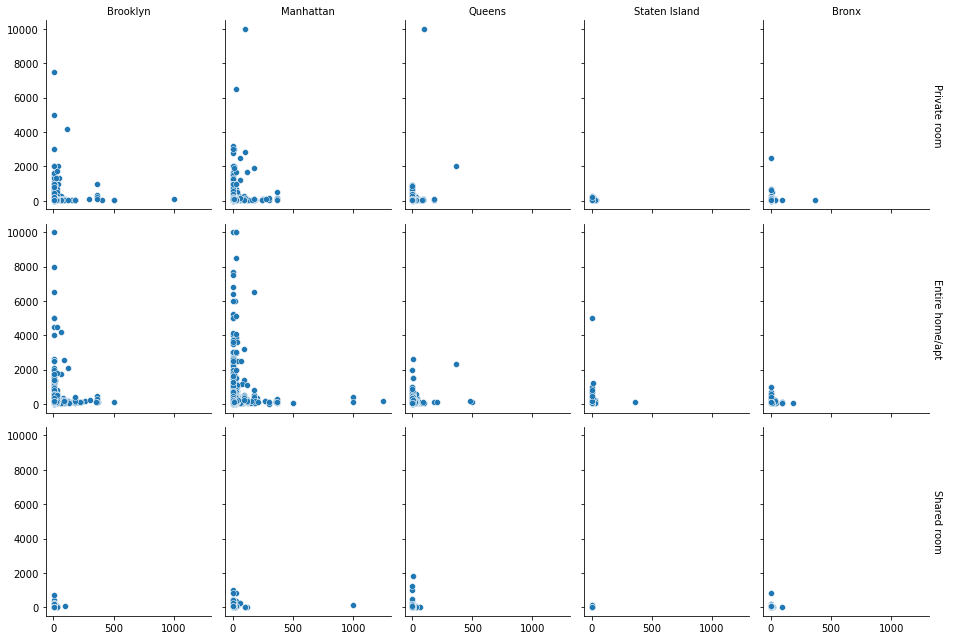

In [49]:
g=sns.FacetGrid(col="neighbourhood_group",data=data,aspect=0.90,row="room_type", margin_titles=True)
g.map_dataframe(sns.scatterplot,x="minimum_nights",y="price")
g.add_legend()
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# plt.savefig("260.jpg",dpi=1000)

* for prices less than 400 dollars,Mean  Minimum nights  for stay is around 7
* Minimum nights Decraeses with increase in price(All the graphs follow a small "L" curve at lower prices)
* Most of the houses with greater minimum nights have lesser price
* some of the apartments in manhattan have greater minimum nights(>700)
* Except for manhattan Almost all the neighbourhoods have minimum nights of less than 500


# Number of reviews

No of reviews and reviews per month are more at less price than higher price as there is less chance of people going for a high priced rooms.


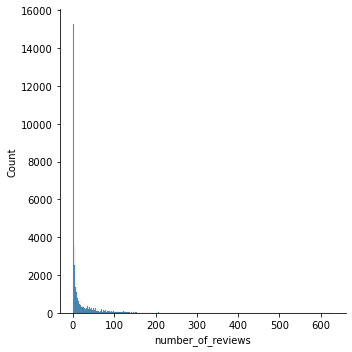

In [50]:
sns.displot(data["number_of_reviews"])
# plt.savefig("270.jpg",dpi=1000)

Text(0.5, 1.0, 'Number of reviews vs Price')

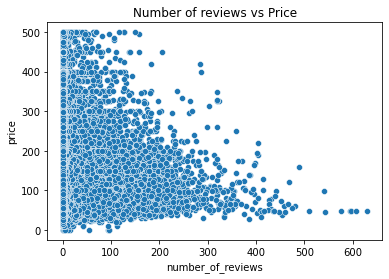

In [51]:
sns.scatterplot(x=data[data["price"]<500]["number_of_reviews"],y=data[data["price"]<500]["price"])
plt.title("Number of reviews vs Price")
# plt.savefig("28.jpg",dpi=1000)

Text(0.5, 1.0, 'num of reviews vs price>500')

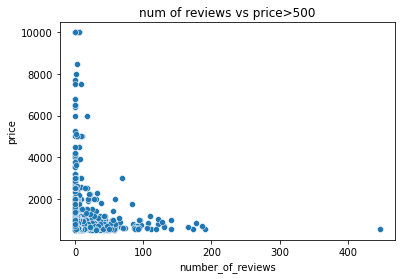

In [52]:
sns.scatterplot(x=data[data["price"]>500]["number_of_reviews"],y=data[data["price"]>500]["price"])
plt.title("num of reviews vs price>500")
# plt.savefig("29.jpg",dpi=1000)

* No of reviews are more at less price than higher price 
* This is because people are less likely to stay in expensive places

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

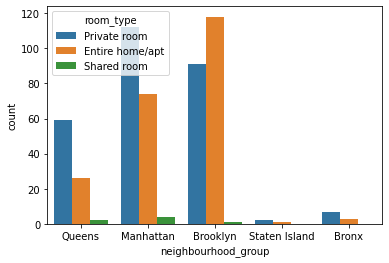

In [53]:
sns.countplot(data=data.sort_values(by="number_of_reviews",ascending=False)[:500],x="neighbourhood_group",hue="room_type")
# plt.savefig("30.jpg",dpi=1000)

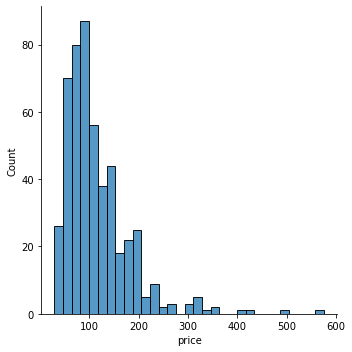

In [54]:
sns.displot(data.sort_values(by="number_of_reviews",ascending=False)[:500]["price"])
# plt.savefig("31.jpg",dpi=1000)

<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

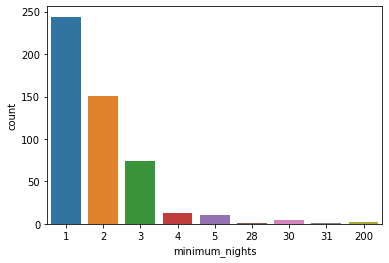

In [55]:
sns.countplot(x=data.sort_values(by="number_of_reviews",ascending=False)[:500]["minimum_nights"])
# plt.savefig("32.jpg",dpi=1000)

Text(0.5, 1.0, 'Num_reviews vs min nights vs price')

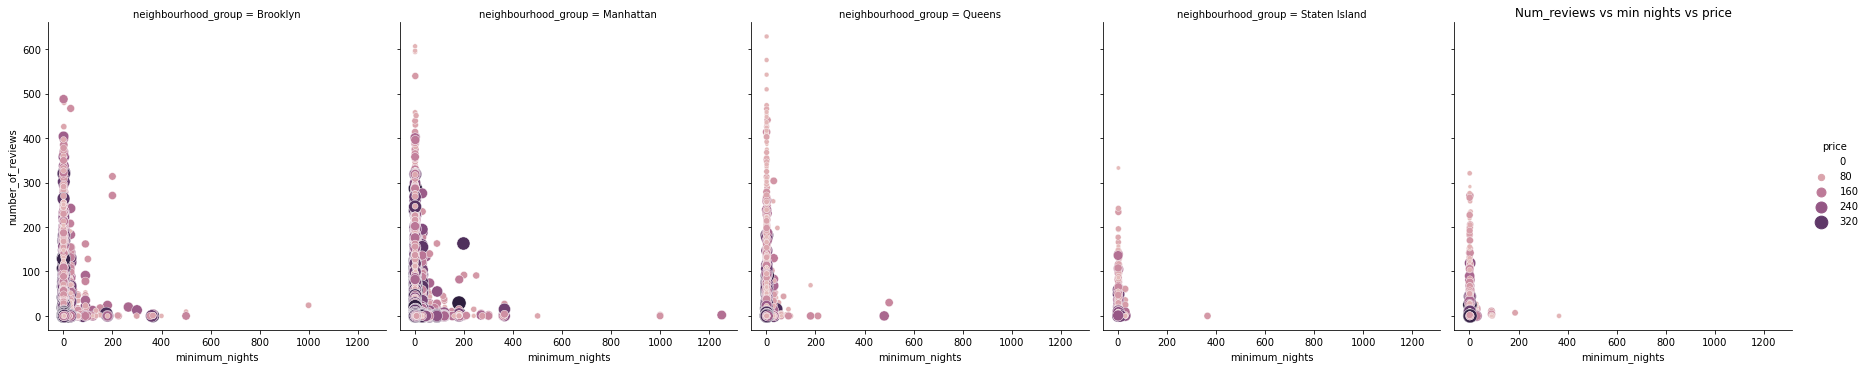

In [56]:
sns.relplot(x=data[data["price"]<400]["minimum_nights"],y=data[data["price"]<400]["number_of_reviews"],hue=data[data["price"]<400]["price"], size=data[data["price"]<400]["price"],col=data[data["price"]<400]["neighbourhood_group"],sizes=(0, 200))
plt.title("Num_reviews vs min nights vs price")
# plt.savefig("33.jpg",dpi=1000)

* If the top 500 listings with maximum reviews are considered, it is evident that most of the reviews are from Brooklyn and Manhattan .
* Also,these people stayed for (1-3) days and spent around 150 for the room.
* Therefore, there are maximum reviews for less minimum nights and less price

# Reviews per month

In [57]:
most_Frequently_reviewed=data.sort_values(by="reviews_per_month",ascending=False)

C:\Users\Sharath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '14'),
  Text(12, 0, '21'),
  Text(13, 0, '25'),
  Text(14, 0, '28'),
  Text(15, 0, '29'),
  Text(16, 0, '30'),
  Text(17, 0, '31'),
  Text(18, 0, '32'),
  Text(19, 0, '90'),
  Text(20, 0, '200')])

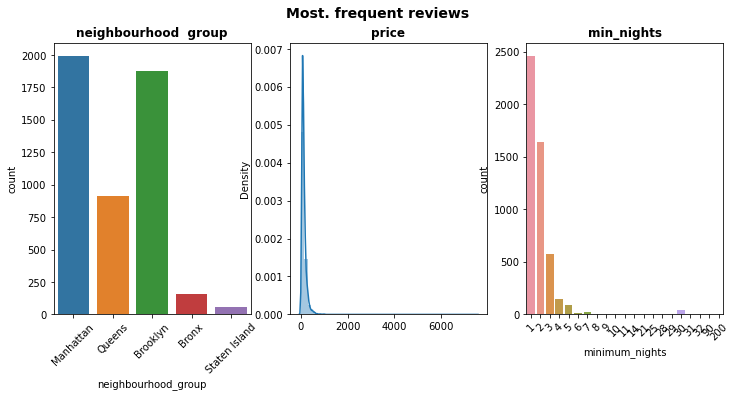

In [58]:
f,ax=plt.subplots(ncols=3,figsize=(12,5))
sns.countplot(x=most_Frequently_reviewed["neighbourhood_group"][:5000],ax=ax[0])
sns.distplot(x=most_Frequently_reviewed["price"][:5000],ax=ax[1])
sns.countplot(x=most_Frequently_reviewed["minimum_nights"][:5000],ax=ax[2])
ax[0].set_title("neighbourhood  group",weight="bold")
ax[1].set_title("price",weight="bold")
ax[2].set_title("min_nights",weight="bold")
f.suptitle('Most. frequent reviews',weight="bold",size=14)
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.sca(ax[2])
plt.xticks(rotation=45)
# plt.savefig("34.jpg",dpi=500)

* Reviews permonth conveys how frequent the reviews are.
* Most of the frequent reviews are from manhattan and brooklyn
* minimum nights for these  were inbetween (1-5)
* Therefore this Shows most reviewers stayed at Manhattan or brooklyn for less than 5 nights.


In [59]:
data.drop(["name","last_review","host_id"],axis=1,inplace=True)

#  corelation

In [60]:
cor_matrix=data.corr()

<AxesSubplot:>

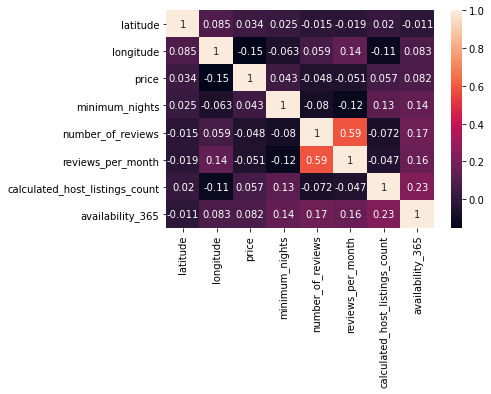

In [61]:
sns.heatmap(cor_matrix,annot=True)
# plt.savefig("35.jpg",dpi=1000)

In [62]:
val,vec=a.eig(cor_matrix)
val

array([1.74056927+0.j, 0.40054105+0.j, 1.38630959+0.j, 0.63701078+0.j,
       1.09803628+0.j, 1.00618075+0.j, 0.85963347+0.j, 0.87171881+0.j])

Since name and host_id are not necessary for predicting the price(Considering the are random), they are dropped.
Almost no variable is strongly corelated,except reviews permonth and number of reviews.This cannot be removed as the corelation is not strong enough.Also,Atleast one of The eigen values of a corelation matrix is not zero.

In [63]:
data1=data.copy()

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [65]:
le = LabelEncoder()                                           
le.fit(data1['neighbourhood_group'])
data1['neighbourhood_group']=le.transform(data1['neighbourhood_group'])   

le =LabelEncoder()
le.fit(data1['neighbourhood'])
data1['neighbourhood']=le.transform(data1['neighbourhood'])

le = LabelEncoder()
le.fit(data1['room_type'])
data1['room_type']=le.transform(data1['room_type'])

In [66]:
data1=data1[data1["price"]<1000]


In [67]:
y=data1["price"]
data1.drop("price",axis=1,inplace=True)

* Since, the depedent variable is heavily skewed , there are around 250  values which can be considered outliers. 
* These values distort the prediction model and hence they can be removed also they are less than 0.5 % of the observations.
* To remove the skewness, log transformation is applied to the dependent variable.This makes it approximately normally distributed.
* Also, our baseline model (Linear Regression) expects all the values to get scaled.

In [68]:
X=data1

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [70]:
sc=StandardScaler()

In [71]:
x_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)


In [72]:
y_trainsc=np.log(y_train+1)
y_testsc=np.log(y_test+1)

In [73]:
lr=LinearRegression()
lr.fit(x_train_sc,y_trainsc)

LinearRegression()

In [74]:
pred_lr=lr.predict(X_test_sc)

In [75]:
r2_score(y_testsc,pred_lr)

0.4977049696289091

In [76]:
#r2_score(np.exp(y_testsc)-1,np.exp(pred_lr)-1)

* This is the baseLine model. Lets try  Random Forest.If this model performs better than Linear regression,then we can try to know the important features which determine the price.

In [77]:
rfr=RandomForestRegressor()

In [78]:
rfr.fit(X_train,y_trainsc)

RandomForestRegressor()

In [79]:
pred=rfr.predict(X_test)

In [80]:
r2_score(y_testsc,pred)

0.63362002268443

In [87]:
for (i,j) in sorted(zip(rfr.feature_importances_,data1.columns),reverse=True):
    print(f"{j}-->{i*100}%")
    

room_type-->40.65178010966976%
longitude-->17.84835003902129%
latitude-->14.30511463658137%
availability_365-->7.046131989672251%
reviews_per_month-->5.32403141103574%
minimum_nights-->4.773658124666344%
number_of_reviews-->4.378809831391528%
calculated_host_listings_count-->2.898838264412877%
neighbourhood-->2.554047737304489%
neighbourhood_group-->0.2192378562443564%


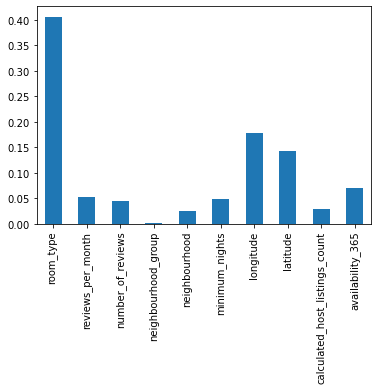

In [82]:
pd.Series(rfr.feature_importances_,index=data1.columns).sort_index(ascending=False).plot(kind="bar")
plt.savefig("39.jpg",dpi=1000)

In [83]:
#r2_score(np.exp(y_testsc)-1,np.exp(pred)-1)

In [84]:
#mean_absolute_error(y_testsc,rfr.predict(X_test))

* This  shows that room_type, avalibilty , min nights and reviews play important role in determining the final price of the listing
* Also, with hyperparameter tuning , a greater r2 can be achieved.
* The model can also be improved using various ML algorithms like Gradient  boosting,Lasso Regression etc
* Also, instead on Label Encoding,  One hot encoding can be done .